# Q Learning VS SARSA
实验环境选用Gym的[cliff walk](https://gymnasium.farama.org/environments/toy_text/cliff_walking/)
## part one
SARSA和Q-learning的主要区别可以用如下所示的公式来表示

$$
\begin{align}
&SARSA:\\
&\quad Q(s_t,a_t) = Q(s_t,a_t) + \alpha(r_t + \gamma Q(s_{t+1},a_{t+1}) - Q(s_t,a_t)) \\
&Q-learning:\\
&\quad Q(s_t,a_t) = Q(s_t,a_t) + \alpha(r_t + \gamma \max_{a'}Q(s_{t+1},a') - Q(s_t,a_t))
\end{align}
$$

在cliff walk环境中分别使用两种策略更新算法来训练agent可以得到非常有趣的结果

In [44]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# 创建 Cliff walk 环境
env = gym.make('CliffWalking-v0')

# 参数设置
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1
gamma = 0.99
epsilon = 0.1
episodes = 500

In [49]:
# epsilon-greedy 策略
def epsilon_greedy(state, Q):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    else:
        return np.argmax(Q[state])

In [47]:
# 训练主函数
def Q_learning():
    # 初始化 Q(s,a) 表格
    Q = np.zeros((n_states, n_actions))
    rewards = []

    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = epsilon_greedy(state,Q)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # Q-learning 更新
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state, best_next_action]
            td_error = td_target - Q[state, action]
            Q[state, action] += alpha * td_error

            state = next_state
            total_reward += reward
    
        rewards.append(total_reward)

        if (episode +1) % 50 == 0:
            print(f"Episode {episode + 1}: total reward = {total_reward}")
    return Q, rewards

In [53]:
# SARSA
def sarsa():
    Q_sarsa = np.zeros((n_states, n_actions))
    rewards_sarsa = []

    for episode in range(episodes):
        state, _ = env.reset()
        action = epsilon_greedy(state,Q_sarsa)
        done = False
        total_reward = 0

        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            next_action = epsilon_greedy(next_state,Q_sarsa)

            td_target = reward + gamma * Q_sarsa[next_state, next_action]
            Q_sarsa[state, action] += alpha * (td_target - Q_sarsa[state, action])

            state = next_state
            action = next_action
            total_reward += reward

        rewards_sarsa.append(total_reward)

        if (episode +1) % 50 == 0:
            print(f"SARSA Episode {episode + 1}: total reward = {total_reward}")
    return Q_sarsa, rewards_sarsa

In [54]:
Q_qlearn, rewards_q = Q_learning()
print()
Q_sarsa, rewards_sarsa = sarsa()
env.close()

Episode 50: total reward = -39
Episode 100: total reward = -28
Episode 150: total reward = -19
Episode 200: total reward = -15
Episode 250: total reward = -21
Episode 300: total reward = -19
Episode 350: total reward = -13
Episode 400: total reward = -14
Episode 450: total reward = -118
Episode 500: total reward = -124

SARSA Episode 50: total reward = -47
SARSA Episode 100: total reward = -25
SARSA Episode 150: total reward = -31
SARSA Episode 200: total reward = -23
SARSA Episode 250: total reward = -15
SARSA Episode 300: total reward = -21
SARSA Episode 350: total reward = -15
SARSA Episode 400: total reward = -22
SARSA Episode 450: total reward = -15
SARSA Episode 500: total reward = -15


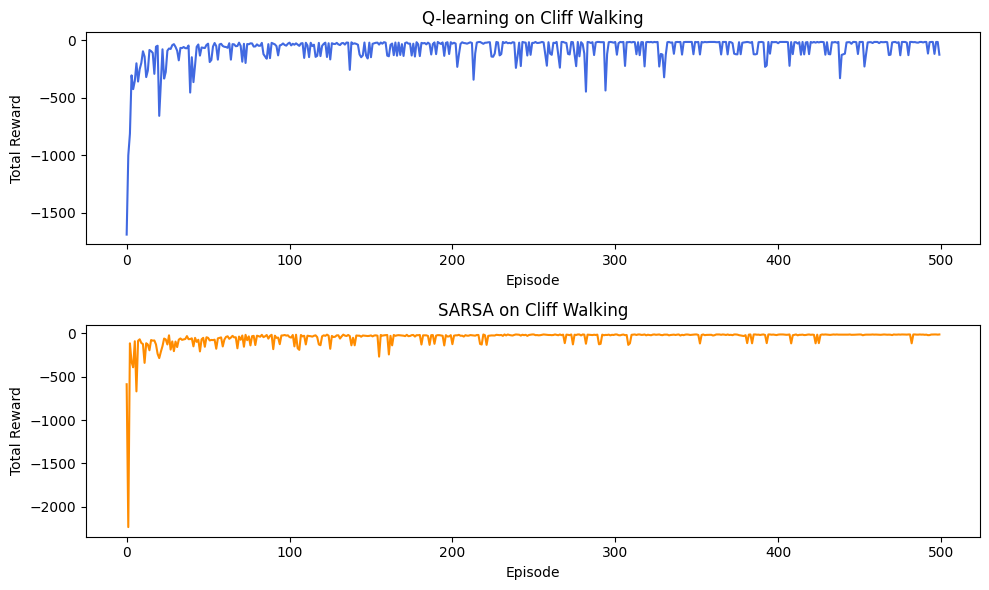

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 子图 1：Q-learning
plt.subplot(2, 1, 1)  # (行, 列, 当前子图编号)
plt.plot(rewards_q, color='royalblue')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Q-learning on Cliff Walking")

# 子图 2：SARSA
plt.subplot(2, 1, 2)
plt.plot(rewards_sarsa, color='darkorange')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("SARSA on Cliff Walking")

plt.tight_layout()  # 自动调整间距，防止标题重叠
plt.show()


In [69]:
import time
import imageio
# 测试训练好的策略
def test_agent(Q, delay=0.2, path = None):
    frames = []  # 用于保存每一帧
    """使用训练好的 Q 表测试 agent 并渲染出行动路径"""
    env_test = gym.make("CliffWalking-v0", render_mode="rgb_array")
    state, _ = env_test.reset()
    done = False
    total_reward = 0

    print("\n=== 测试开始 ===")

    while not done:
        action = np.argmax(Q[state])  # 选择最优动作
        next_state, reward, terminated, truncated, _ = env_test.step(action)
        total_reward += reward
        done = terminated or truncated

        # 保存测试结果为 gif 
        frame = env_test.render()
        frames.append(frame)

        time.sleep(delay)  # 控制播放速度
        state = next_state

    print(f"测试结束，总奖励: {total_reward}")
    env_test.close()

    if len(frames) > 0:
        imageio.mimsave(path, frames, fps = int(1/delay))

In [70]:
test_agent(Q_qlearn, delay = 0.2, path = "q_learning_cliffwalking.gif")


=== 测试开始 ===
测试结束，总奖励: -13


In [71]:
test_agent(Q_sarsa, delay = 0.2, path = "sarsa_cliffwalking.gif")


=== 测试开始 ===
测试结束，总奖励: -15
